In [43]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import tensorflow.compat.v1 as dataframe
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline


In [45]:

dataframe.test.gpu_device_name()
x=pd.read_csv("drive/My Drive/kddcup.data_10_percent_corrected",header=None,names=[str(i) for i in range(42)])
x_test=pd.read_csv("drive/My Drive/corrected",header=None,names=[str(i) for i in range(42)])
x_nsl_test=pd.read_csv("drive/My Drive/KDDTest+.txt",header=None,names=[str(i) for i in range(43)])
x_nsl=pd.read_csv("drive/My Drive/KDDTrain+.txt",header=None,names=[str(i) for i in range(43)])
le = preprocessing.LabelEncoder()
for i in range(1,4):
  x[str(i)]=le.fit_transform(x[str(i)])
  x_test[str(i)]=le.fit_transform(x_test[str(i)])
  x_nsl[str(i)]=le.fit_transform(x_nsl[str(i)])
  x_nsl_test[str(i)]=le.fit_transform(x_nsl_test[str(i)])

print(x.shape)
print(x_test.shape)
print(x_nsl.shape)
print(x_nsl_test.shape)

(494021, 42)
(311029, 42)
(125973, 43)
(22544, 43)


In [46]:
f=['land.','ftp_write.','imap.','multihop.','phf.','spy.','warezmaster.','warezclient.','loadmodule.','rootkit.','perl.','land','ftp_write','imap','multihop','phf','spy','warezmaster','warezclient','loadmodule','rootkit','perl']
x = x[~x['41'].isin(f)]
x_test = x_test[~x_test['41'].isin(f)]


In [47]:
ff=set(x.iloc[:,-1])
x_test = x_test[x_test['41'].isin(ff)]
print(x_test.shape)

(290648, 42)


In [48]:
set(x_test.iloc[:,-1])

{'back.',
 'buffer_overflow.',
 'guess_passwd.',
 'ipsweep.',
 'neptune.',
 'nmap.',
 'normal.',
 'pod.',
 'portsweep.',
 'satan.',
 'smurf.',
 'teardrop.'}

In [49]:
set(x.iloc[:,-1])

{'back.',
 'buffer_overflow.',
 'guess_passwd.',
 'ipsweep.',
 'neptune.',
 'nmap.',
 'normal.',
 'pod.',
 'portsweep.',
 'satan.',
 'smurf.',
 'teardrop.'}

In [50]:
x_nsl=x_nsl.iloc[:,:-1]
x_nsl_test=x_nsl_test.iloc[:,:-1]
print(x_nsl.shape)

(125973, 42)


In [51]:
le.fit(x[str(41)])
x[str(41)]=le.transform(x[str(41)])
x_test[str(41)]=le.transform(x_test[str(41)])
#le.transform(x_nsl[str(41)])
#le.transform(x_nsl_test[str(41)])

In [52]:
x=x.to_numpy()
x_test=x_test.to_numpy()

In [53]:
x_cp=x
x_test_cp= x_test

In [54]:
x= StandardScaler().fit_transform(x)
x_test= StandardScaler().fit_transform(x_test)

In [55]:
def deep_auto_encoder(num_input,encoded_data,test_data):
    graph = []
    learning_rate = 0.01
    num_steps = 16000
    batch_size = 25
    display_step = 2000
    num_hidden_1 = 14
    num_hidden_2 = 28 
    num_hidden_3 = 28 
    #num_hidden_4 = 20

    dataframe.disable_v2_behavior()
    X = dataframe.placeholder("float32", [None, num_input])
    
    #X = dataframe.placeholder("float32", [None, num_input])


    weights = {
        'encoder_h1': dataframe.Variable(dataframe.random_normal([num_input, num_hidden_1]),name='encoder_h1'),
        'encoder_h2': dataframe.Variable(dataframe.random_normal([num_hidden_1, num_hidden_2]),name='encoder_h2'),
        'encoder_h3': dataframe.Variable(dataframe.random_normal([num_hidden_2, num_hidden_3]),name='encoder_h3'),
        'decoder_h1': dataframe.Variable(dataframe.random_normal([num_hidden_3, num_input]),name='decoder_h1'),
        #'decoder_h2': dataframe.Variable(dataframe.random_normal([num_hidden_4, num_input]),name='decoder_h2')


    }
    biases = {
        'encoder_b1': dataframe.Variable(dataframe.random_normal([num_hidden_1]),name='bencoder_h1'),
        'encoder_b2': dataframe.Variable(dataframe.random_normal([num_hidden_2]),name='bencoder_h2'),
        'encoder_b3': dataframe.Variable(dataframe.random_normal([num_hidden_3]),name='bencoder_h3'),
        'decoder_b1': dataframe.Variable(dataframe.random_normal([num_input]),name='bdecoder_h1'),
        #'decoder_b2': dataframe.Variable(dataframe.random_normal([num_input]),name='bdecoder_h2')


    }
    
    

    def encoder(x):
        layer_1 = dataframe.nn.sigmoid(dataframe.add(dataframe.matmul(x, weights['encoder_h1']),
                                       biases['encoder_b1']))
        layer_2 = dataframe.nn.sigmoid(dataframe.add(dataframe.matmul(layer_1, weights['encoder_h2']),
                                       biases['encoder_b2']))
        layer_3 = dataframe.nn.sigmoid(dataframe.add(dataframe.matmul(layer_2, weights['encoder_h3']),
                                       biases['encoder_b3']))
        return layer_3



    def decoder(x):
        layer_1 = dataframe.nn.sigmoid(dataframe.add(dataframe.matmul(x, weights['decoder_h1']),
                                       biases['decoder_b1']))
        #layer_2 = dataframe.nn.sigmoid(dataframe.add(dataframe.matmul(layer_1, weights['decoder_h2']),
        #                               biases['decoder_b2']))
        
        return layer_1

    # Construct model
    encoder_op = encoder(X)
    decoder_op = decoder(encoder_op)

    y_pred = decoder_op
    y_true = X


    loss = dataframe.reduce_mean(dataframe.pow(y_true - y_pred, 2))
    optimizer = dataframe.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    init = dataframe.global_variables_initializer()
    print(len(encoded_data))
    with dataframe.Session() as sess:
        sess.run(init)
        j=0
        for i in range(1, num_steps+1):
            batch_x= encoded_data[j:j+batch_size]
            _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
            if i % display_step == 0 or i == 1:
                print('Step %i: Minibatch Loss: %f' % (i, l))
                graph.append(l)
            j=j+batch_size
        
        batch_x = encoded_data
        g = sess.run(encoder_op, feed_dict={X: batch_x})
        
        batch_x = test_data
        g_test = sess.run(encoder_op, feed_dict={X: batch_x})
        
        print("g-shape: ",g.shape)
        print("g_test-shape: ",g_test.shape)
    plt.plot(graph[:])
    plt.show()
    sess.close()
    return g,g_test,encoder

492905
Step 1: Minibatch Loss: 1.222857
Step 2000: Minibatch Loss: 0.300383
Step 4000: Minibatch Loss: 0.251528
Step 6000: Minibatch Loss: 0.243341
Step 8000: Minibatch Loss: 0.198470
Step 10000: Minibatch Loss: 0.180720
Step 12000: Minibatch Loss: 0.168013
Step 14000: Minibatch Loss: 1.006831
Step 16000: Minibatch Loss: 0.180742
g-shape:  (492905, 28)
g_test-shape:  (290648, 28)


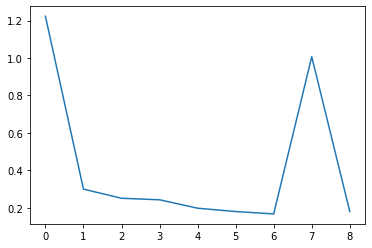

492905
Step 1: Minibatch Loss: 0.225564
Step 2000: Minibatch Loss: 0.130680
Step 4000: Minibatch Loss: 0.104880
Step 6000: Minibatch Loss: 0.098204
Step 8000: Minibatch Loss: 0.071390
Step 10000: Minibatch Loss: 0.066215
Step 12000: Minibatch Loss: 0.063378
Step 14000: Minibatch Loss: 0.183096
Step 16000: Minibatch Loss: 0.070174
g-shape:  (492905, 28)
g_test-shape:  (290648, 28)


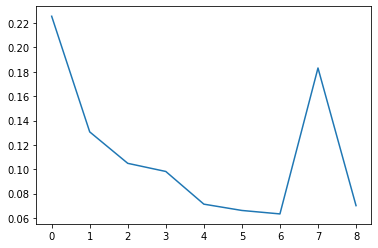

In [56]:
train_1,test_1,model_1= deep_auto_encoder(41,x[:,:-1],x_test[:,:-1])
train_2,test_2,model_2= deep_auto_encoder(28,train_1,test_1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=110, max_depth=6, random_state=0)

In [58]:
clf.fit(train_2,x_cp[:,-1] )

RandomForestClassifier(max_depth=6, n_estimators=110, random_state=0)

In [59]:
y_pred= clf.predict(test_2)

In [60]:
y_p=le.fit_transform(y_pred)
y_p=y_p.reshape(-1,1)
y_test=x_test_cp[:,-1].reshape(-1,1)
print(y_test.shape)


(290648, 1)


In [61]:
print(clf.score(test_2,y_test))

0.9737345517602047


In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.9737345517602047